# Pre-analytics & Data Process

In [26]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from scipy import stats
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearnex import patch_sklearn
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
import numpy as np

# Patch scikit-learn with GPU-enabled versions
patch_sklearn()

# Load the data
X_train_fr = pd.read_csv('x_train_fr.csv')
X_train_de = pd.read_csv('x_train_de.csv')
X_test_fr = pd.read_csv('x_test_fr.csv')
X_test_de = pd.read_csv('x_test_de.csv')
y_test_fr = pd.read_csv('y_test_fr.csv')
y_test_de = pd.read_csv('y_test_de.csv')
y_train_fr = pd.read_csv('y_train_fr.csv')
y_train_de = pd.read_csv('y_train_de.csv')

# Display the first few rows of the dataset to understand its structure
X_test_de.head()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,FR_DE_EXCHANGE,DE_NET_IMPORT,FR_NET_IMPORT,DE_GAS,FR_GAS,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,730,1068,DE,1.458140,0.655233,-0.410717,-1.284736,-0.450144,-0.208664,0.434705,...,-0.169851,-0.204061,-0.219260,7.149098,3.216234,3.113181,2.139785,-0.211592,-1.165030,0.914272
1,273,959,DE,-0.014648,-0.873181,2.081281,1.108016,-1.208788,-0.410501,-1.230979,...,-1.504244,2.156969,5.218516,0.117698,0.445306,-1.601896,-1.370031,0.408783,-0.369350,-0.738291
2,911,499,DE,-0.800945,-1.390917,-0.302098,-0.793661,-0.411873,-0.734524,-0.043101,...,-2.096396,-0.192578,0.683547,1.384888,2.358903,1.433337,0.906934,1.053799,-1.363392,-0.726740
3,274,1050,DE,-0.132038,-0.697277,1.299494,1.628553,-1.093077,0.735354,-0.390132,...,-0.809076,-0.565251,-0.300878,-0.789039,-0.538239,-2.434426,-1.554886,-1.214039,-0.734142,-2.341894
4,619,291,DE,-0.056473,-0.728421,0.340486,-0.057127,-0.916117,0.175566,0.068640,...,-0.688561,-0.533701,-0.817087,0.006579,0.787396,-0.163353,0.422565,0.453732,0.103504,1.572016


In [27]:
X_train_fr.drop(columns=['COUNTRY'], inplace=True)
X_test_fr.drop(columns=['COUNTRY'], inplace=True)
y_true_fr = y_test_fr.iloc[:, 0]
y_train_fr_1 = y_train_fr.iloc[:, 1]


In [28]:
X_train_de.drop(columns=['COUNTRY'], inplace=True)
X_test_de.drop(columns=['COUNTRY'], inplace=True)
y_true_de = y_test_de.iloc[:, 0]
y_train_de_1 = y_train_de.iloc[:, 1]

# Modeling

7. Gradient Boosting Regressor

In [31]:

GBR = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [10, 20, 30, 50, 100, 200],
    'learning_rate': [0.0001, 0.001, 0.005, 0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=GBR, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search.fit(X_train_fr, y_train_fr)
GBR = grid_search.best_estimator_

print("\nBest Parameters:", grid_search.best_params_)


Best Parameters: {'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 50}


In [ ]:
y_pred_gradient_boosting = GBR.predict(X_test_fr)

MAE_gradient_boosting = mean_absolute_error(y_test_fr, y_pred_gradient_boosting)
MSE_gradient_boosting = mean_squared_error(y_test_fr, y_pred_gradient_boosting)
R2_gradient_boosting = explained_variance_score(y_test_fr, y_pred_gradient_boosting)

Corr_gradient_boosting, _ = stats.spearmanr(y_test_fr, y_pred_gradient_boosting[:, 1])

print("Evaluation Metrics:")
print("MAE:", MAE_gradient_boosting)
print("MSE:", MSE_gradient_boosting)
print("R2 Score:", R2_gradient_boosting)
print("Spearman Correlation:", Corr_gradient_boosting)

6. XGBOOST Regressor

In [ ]:
xgboost = xgb.XGBRegressor()

param_grid = {
    'n_estimators': [200, 500, 1000],
    'max_depth': [1, 2, 3, 5],
    'learning_rate': [0.005, 0.01, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9]
}

xgboost.fit(X_train_fr, y_train_fr)

grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search.fit(X_train_fr, y_train_fr)
xgboost = grid_search.best_estimator_

print("\nBest Parameters:", grid_search.best_params_)

In [115]:
xgboost_best_fr = xgb.XGBRegressor(
    n_estimators= 496,
    max_depth= 3, 
    learning_rate= 0.2,
    subsample = 0.6,
    colsample_bytree= 0.7
)

xgboost_best_fr.fit(X_train_fr, y_train_fr)
y_pred_xgboost_fr = xgboost_best_fr.predict(X_test_fr)


Y_test_target = y_test_fr['TARGET'].values

MAE_xgboost_fr = mean_absolute_error(Y_test_target, y_pred_xgboost_fr[:, 1])
MSE_xgboost_fr = mean_squared_error(Y_test_target, y_pred_xgboost_fr[:, 1])
Corr_xgboost_fr, _ = stats.spearmanr(Y_test_target, y_pred_xgboost_fr[:, 1])

print("Evaluation Metrics Test:")
print("MAE:", MAE_xgboost_fr)
print("MSE:", MSE_xgboost_fr)
print("Spearman Correlation:", Corr_xgboost_fr)

Evaluation Metrics Test:
MAE: 1.0012501723776461
MSE: 1.5238055116791018
Spearman Correlation: 0.07277819867085532


In [284]:
y_train_xgboost_fr = xgboost_best_fr.predict(X_train_fr)

Y_train_target_fr = y_train_fr['TARGET'].values

MAE_xgboost_fr_train = mean_absolute_error(Y_train_target_fr, y_train_xgboost_fr[:, 1])
MSE_xgboost_fr_train = mean_squared_error(Y_train_target_fr, y_train_xgboost_fr[:, 1])
Corr_xgboost_fr_train, _ = stats.spearmanr(Y_train_target_fr, y_train_xgboost_fr[:, 1])

print("Evaluation Metrics Train:")
print("MAE:", MAE_xgboost_fr_train)
print("MSE:", MSE_xgboost_fr_train)
print("Spearman Correlation:", Corr_xgboost_fr_train)

Evaluation Metrics Train:
MAE: 0.048678010424371095
MSE: 0.0040549082974138855
Spearman Correlation: 0.9788001192262438


In [ ]:
xgboost_de = xgb.XGBRegressor()

param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7, 0.8]
}

xgboost.fit(X_train_de, y_train_de)

grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search.fit(X_train_de, y_train_de)
xgboost = grid_search.best_estimator_

print("\nBest Parameters:", grid_search.best_params_)

In [112]:
xgboost_best_de = xgb.XGBRegressor(
    n_estimators= 87,
    max_depth= 3, 
    learning_rate= 0.3,
    subsample = 0.7,
    colsample_bytree= 0.7
)

xgboost_best_de.fit(X_train_de, y_train_de)
y_pred_xgboost_de = xgboost_best_de.predict(X_test_de)

Y_test_target_de = y_test_de['TARGET'].values

MAE_xgboost_de = mean_absolute_error(Y_test_target_de, y_pred_xgboost_de[:, 1])
MSE_xgboost_de = mean_squared_error(Y_test_target_de, y_pred_xgboost_de[:, 1])
Corr_xgboost_de, _ = stats.spearmanr(Y_test_target_de, y_pred_xgboost_de[:, 1])

print("Evaluation Metrics Test:")
print("MAE:", MAE_xgboost_de)
print("MSE:", MSE_xgboost_de)
print("Spearman Correlation:", Corr_xgboost_de)

Evaluation Metrics Test:
MAE: 0.8808782238636946
MSE: 1.1981974183318633
Spearman Correlation: 0.1448096885813149


In [114]:
y_train_xgboost_de = xgboost_best_de.predict(X_train_de)

Y_train_target_de = y_train_de['TARGET'].values

MAE_xgboost_de_train = mean_absolute_error(Y_train_target_de, y_train_xgboost_de[:, 1])
MSE_xgboost_de_train = mean_squared_error(Y_train_target_de, y_train_xgboost_de[:, 1])
Corr_xgboost_de_train, _ = stats.spearmanr(Y_train_target_de, y_train_xgboost_de[:, 1])

print("Evaluation Metrics Train:")
print("MAE:", MAE_xgboost_de_train)
print("MSE:", MSE_xgboost_de_train)
print("Spearman Correlation:", Corr_xgboost_de_train)

Evaluation Metrics Train:
MAE: 0.24050194074302425
MSE: 0.10881344210362637
Spearman Correlation: 0.8881427355455506


In [250]:
y_test = pd.concat([y_test_fr, y_test_de])
Y_test = y_test['TARGET'].values

In [248]:
y_pred_xgboost = np.concatenate((y_pred_xgboost_fr, y_pred_xgboost_de))

In [253]:
MAE_xgboost = mean_absolute_error(Y_test, y_pred_xgboost[:, 1])
MSE_xgboost = mean_squared_error(Y_test, y_pred_xgboost[:, 1])
Corr_xgboost, _ = stats.spearmanr(Y_test, y_pred_xgboost[:, 1])

print("Evaluation Metrics Test:")
print("MAE:", MAE_xgboost)
print("MSE:", MSE_xgboost)
print("Spearman Correlation:", Corr_xgboost)

Evaluation Metrics Test:
MAE: 0.9480582868722456
MSE: 1.3799205896953832
Spearman Correlation: 0.10328220573010817


In [286]:
y_train = pd.concat([y_train_fr, y_train_de])
Y_train = y_train['TARGET'].values

In [287]:
y_train_xgboost = np.concatenate((y_train_xgboost_fr, y_train_xgboost_de))

In [288]:
MAE_xgboost_train = mean_absolute_error(Y_train, y_train_xgboost[:, 1])
MSE_xgboost_train = mean_squared_error(Y_train, y_train_xgboost[:, 1])
Corr_xgboost_train, _ = stats.spearmanr(Y_train, y_train_xgboost[:, 1])

print("Evaluation Metrics Train:")
print("MAE:", MAE_xgboost_train)
print("MSE:", MSE_xgboost_train)
print("Spearman Correlation:", Corr_xgboost_train)

Evaluation Metrics Train:
MAE: 0.13123677026031083
MSE: 0.049141747144398236
Spearman Correlation: 0.919573285586104


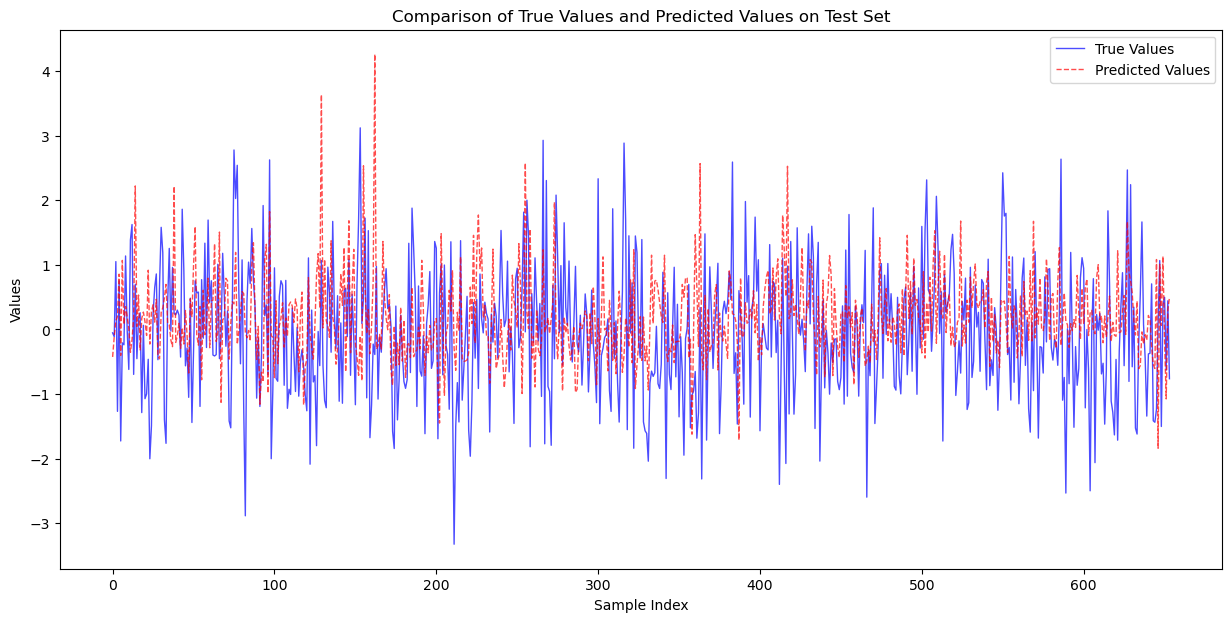

In [294]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))

plt.plot(Y_test, label='True Values', color='blue', linestyle='-', linewidth=1, alpha=0.7)

plt.plot(y_pred_xgboost[:, 1], label='Predicted Values', color='red', linestyle='--', linewidth=1, alpha=0.7)

plt.legend()

plt.title('Comparison of True Values and Predicted Values on Test Set')
plt.xlabel('Sample Index')
plt.ylabel('Values')

plt.show()

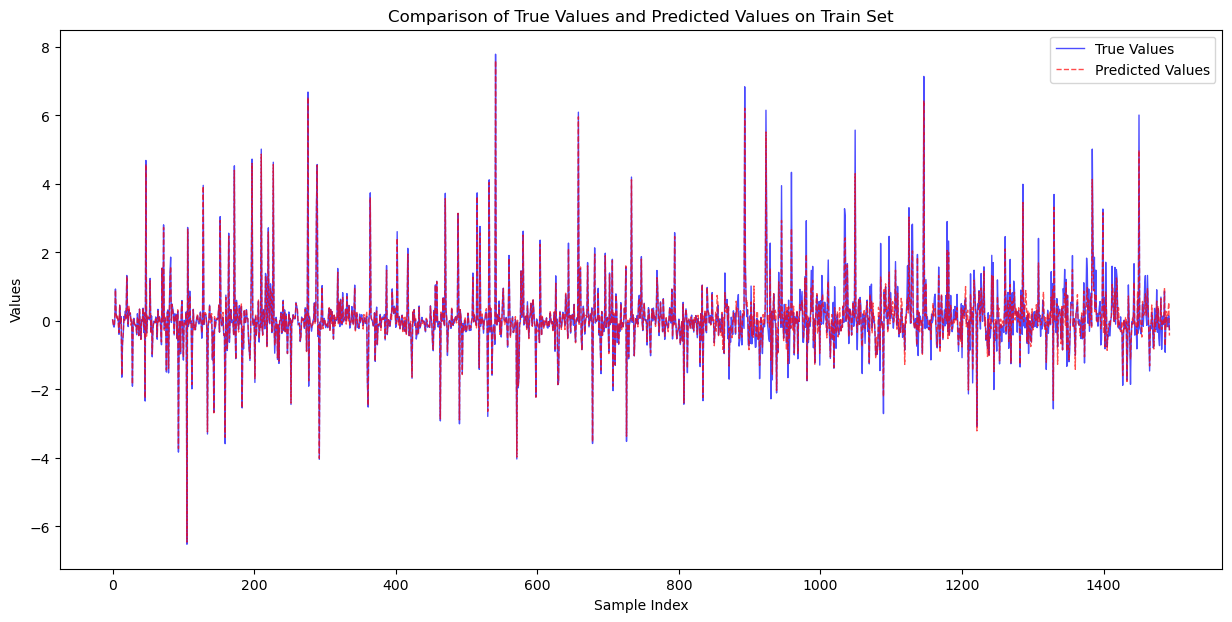

In [295]:
plt.figure(figsize=(15, 7))

plt.plot(Y_train, label='True Values', color='blue', linestyle='-', linewidth=1, alpha=0.7)

plt.plot(y_train_xgboost[:, 1], label='Predicted Values', color='red', linestyle='--', linewidth=1, alpha=0.7)

plt.legend()

plt.title('Comparison of True Values and Predicted Values on Train Set')
plt.xlabel('Sample Index')
plt.ylabel('Values')

plt.show()